In [33]:
import pandas as pd
import numpy as np

data = pd.read_csv('C:/Users/76000/Desktop/tianchi/oppo/oppo_round1_train_20180929.txt', sep='\t', header=None,
                     names = ['prefix','query_prediction','title','tag','label'])

data.head()

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,prefix,query_prediction,title,tag,label
0,小品,"{""小品大全宋小宝"": ""0.009"", ""小品相亲"": ""0.012"", ""小品剧本"": ...",小品,阅读,0
1,1368,"{""13688cc赛马会"": ""0.059"", ""13685367892"": ""0.124""...",HCG大于1368%2C正常吗,健康,0
2,1368,"{""13688cc赛马会"": ""0.059"", ""13685367892"": ""0.124""...",1368年,百科,1
3,银耳,"{""银耳汤的功效"": ""0.012"", ""银耳为什么不能天天吃"": ""0.009"", ""银耳...",银耳红枣汤的做法,菜谱,1
4,月经量少,"{""月经量少喝红糖水好吗"": ""0.010"", ""月经量少该怎么调理"": ""0.016"", ...",月经量少怎么调理,百科,0


In [24]:
data.shape

(1999999, 5)

In [26]:
temp = data.loc[0]

In [27]:
temp.query_prediction

'{"小品大全宋小宝": "0.009", "小品相亲": "0.012", "小品剧本": "0.020", "小品搞笑大全": "0.066", "小品不差钱": "0.007", "小品搞笑大全剧本": "0.010", "小品大全": "0.198", "小品演员": "0.024", "小品视频": "0.010", "小品大全剧本幽默大全": "0.017"}'

In [28]:
data.tag.unique()

array(['阅读', '健康', '百科', '菜谱', '应用', '经验', '知道', '音乐', '游戏', '网站', '影视',
       '旅游', '快应用', '汽车', '歌手', '网页', '景点', '火车', '商品', '酒店', '航班', '推广',
       '等你花开花又落'], dtype=object)

In [29]:
len(data.tag.unique())

23

In [36]:
import scipy.io
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

tag_list = list(data.tag.unique())

bar_count = np.zeros((len(data.tag.unique()),2))

for i in range(0,data.shape[0]):
    t = data.loc[i].tag
    l = data.loc[i].label
    index = tag_list.index(t)
    if l == 0:
        bar_count[index][0] += 1
    else:
        bar_count[index][1] += 1
print(bar_count)

[[  5.38140000e+04   2.45950000e+04]
 [  9.19790000e+04   4.77250000e+04]
 [  4.06528000e+05   3.15568000e+05]
 [  5.20450000e+04   4.33990000e+04]
 [  2.00060000e+05   1.30703000e+05]
 [  6.20990000e+04   6.37080000e+04]
 [  9.19260000e+04   3.97650000e+04]
 [  5.24300000e+04   2.48210000e+04]
 [  6.90500000e+03   6.86600000e+03]
 [  6.91760000e+04   8.35500000e+04]
 [  1.71240000e+04   1.07300000e+04]
 [  1.45170000e+04   3.77800000e+03]
 [  1.94330000e+04   7.72400000e+03]
 [  1.10220000e+04   1.47010000e+04]
 [  1.25580000e+04   2.33500000e+03]
 [  1.22300000e+03   3.27000000e+02]
 [  5.26000000e+03   3.86700000e+03]
 [  3.38000000e+02   8.33000000e+02]
 [  3.66800000e+03   9.13000000e+02]
 [  7.95000000e+02   2.69000000e+02]
 [  6.24000000e+02   2.93000000e+02]
 [  4.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00]]


In [37]:
sum(sum(bar_count))

1999999.0

In [38]:
bar_count[22][1]

1.0

In [39]:
bar_count[22][0]

0.0

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['STKAITI'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


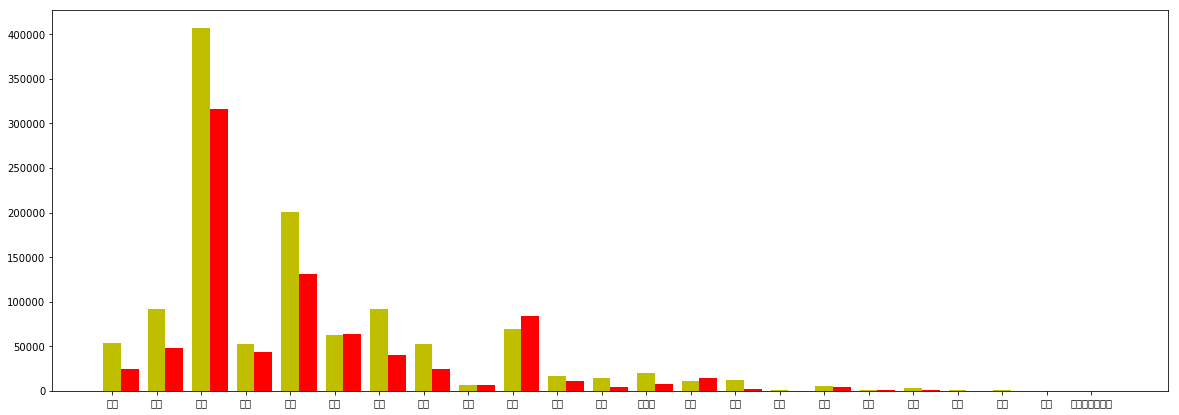

In [57]:
total_width, n = 0.8, 2
width = total_width / n
x=list(range(0,len(data.tag.unique())))

fig = plt.figure(figsize=(20,7))

a=plt.bar(x, bar_count[:,0], width=width, label='0',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
b=plt.bar(x, bar_count[:,1], width=width, label='1',tick_label = tag_list, fc = 'r')

plt.xticks(list(range(0,len(data.tag.unique()))),tag_list)

plt.show()


In [63]:
rate = []
for i in range(0,bar_count.shape[0]):
    if bar_count[i][0] == 0:
        r = 1
    else:
        r = bar_count[i][1]/(bar_count[i][0] + bar_count[i][1])
    rate.append(r)
print(rate)

[0.31367572600084176, 0.3416151291301609, 0.4370166847621369, 0.45470642470977746, 0.39515604828835149, 0.50639471571534178, 0.30195685354352236, 0.32130328409988218, 0.49858398082927891, 0.54705813024632344, 0.38522294823005671, 0.20650450942880569, 0.28442022314688664, 0.57151187653073121, 0.15678506680991069, 0.21096774193548387, 0.42368795880354992, 0.71135781383432961, 0.19930146256275921, 0.25281954887218044, 0.31952017448200654, 0.0, 1]


In [64]:
tag_dict = dict(zip(tag_list,rate))
print(tag_dict)

{'阅读': 0.31367572600084176, '健康': 0.3416151291301609, '百科': 0.4370166847621369, '菜谱': 0.45470642470977746, '应用': 0.39515604828835149, '经验': 0.50639471571534178, '知道': 0.30195685354352236, '音乐': 0.32130328409988218, '游戏': 0.49858398082927891, '网站': 0.54705813024632344, '影视': 0.38522294823005671, '旅游': 0.20650450942880569, '快应用': 0.28442022314688664, '汽车': 0.57151187653073121, '歌手': 0.15678506680991069, '网页': 0.21096774193548387, '景点': 0.42368795880354992, '火车': 0.71135781383432961, '商品': 0.19930146256275921, '酒店': 0.25281954887218044, '航班': 0.31952017448200654, '推广': 0.0, '等你花开花又落': 1}


In [65]:
#根据tag属性制作RATE属性
RATE = []
for i in range(0,data.shape[0]):
    key = data.loc[i].tag
    temp = tag_dict.get(key)
    RATE.append(temp)
print(RATE)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [66]:
len(RATE)

1999999

In [67]:
LABEL = data.label

In [68]:
type(RATE)

list

In [69]:
LABEL = list(data.label)

In [70]:
len(LABEL)

1999999

In [ ]:
######       'RATE' : RATE     ########            ###########      'LABEL' : LABEL       ##########

In [91]:
sub_data = data.query_prediction
temp = eval(sub_data[0])
print(temp)
print(type(temp))

{'小品大全宋小宝': '0.009', '小品相亲': '0.012', '小品剧本': '0.020', '小品搞笑大全': '0.066', '小品不差钱': '0.007', '小品搞笑大全剧本': '0.010', '小品大全': '0.198', '小品演员': '0.024', '小品视频': '0.010', '小品大全剧本幽默大全': '0.017'}
<class 'dict'>


In [94]:
v = list(temp.values())
print(type(v))

<class 'list'>


In [101]:
V = list(map(float,v))
print(V)

[0.009, 0.012, 0.02, 0.066, 0.007, 0.01, 0.198, 0.024, 0.01, 0.017]


In [102]:
V = np.array(V)

In [103]:
V

array([ 0.009,  0.012,  0.02 ,  0.066,  0.007,  0.01 ,  0.198,  0.024,
        0.01 ,  0.017])

In [106]:
print(V.max())

0.198


In [107]:
print(V.shape[0])

10


In [108]:
print(V.std())

0.0560232987247


In [112]:
MAX = []
COUNT = []
STD = []

for i in range(0,data.shape[0]):
    temp = eval(sub_data[i])
    v = list(temp.values())
    V = list(map(float,v))
    V = np.array(V)
    if V.shape[0] == 0:
        max = 0
        std = 0
    else:
        max = V.max()
        std = V.std()
    MAX.append(max)
    COUNT.append(V.shape[0])
    STD.append(std)
print(len(MAX))
print(len(COUNT))
print(len(STD))

1999999
1999999
1999999


In [114]:
train_x = pd.DataFrame({'RATE':RATE, 'MAX':MAX, 'STD':STD, 'COUNT':COUNT})
train_y = pd.DataFrame({'LABEL':LABEL})

In [116]:
train_x.to_csv('train_x.csv', index = False)
train_y.to_csv('train_y.csv', index = False)

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('C:/Users/76000/Desktop/tianchi/oppo/oppo_round1_train_20180929.txt', sep='\t', header=None,
                     names = ['prefix','query_prediction','title','tag','label'])

tag_list = list(data.tag.unique())

bar_count = np.zeros((len(data.tag.unique()),2))

for i in range(0,data.shape[0]):
    t = data.loc[i].tag
    l = data.loc[i].label
    index = tag_list.index(t)
    if l == 0:
        bar_count[index][0] += 1
    else:
        bar_count[index][1] += 1
        
rate = []
for i in range(0,bar_count.shape[0]):
    if bar_count[i][0] == 0:
        r = 1
    else:
        r = bar_count[i][1]/(bar_count[i][0] + bar_count[i][1])
    rate.append(r)

tag_dict = dict(zip(tag_list,rate))

RATE = []
for i in range(0,data.shape[0]):
    key = data.loc[i].tag
    temp = tag_dict.get(key)
    RATE.append(temp)

LABEL = list(data.label)

sub_data = data.query_prediction

MAX = []
COUNT = []
STD = []

for i in range(0,data.shape[0]):
    temp = eval(sub_data[i])
    v = list(temp.values())
    V = list(map(float,v))
    V = np.array(V)
    if V.shape[0] == 0:
        max = 0
        std = 0
    else:
        max = V.max()
        std = V.std()
    MAX.append(max)
    COUNT.append(V.shape[0])
    STD.append(std)

train_x = pd.DataFrame({'RATE':RATE, 'MAX':MAX, 'STD':STD, 'COUNT':COUNT})
train_y = pd.DataFrame({'LABEL':LABEL})

train_x.to_csv('train_x.csv', index = False)
train_y.to_csv('train_y.csv', index = False)

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
l = []
for i in range(0,data.shape[0]):
    if LABEL[i] == 0:
        l.append(0)
    else:
        l.append(1)
train_y = pd.DataFrame({'LABEL':l})
train_y.to_csv('train_y.csv', index = False)

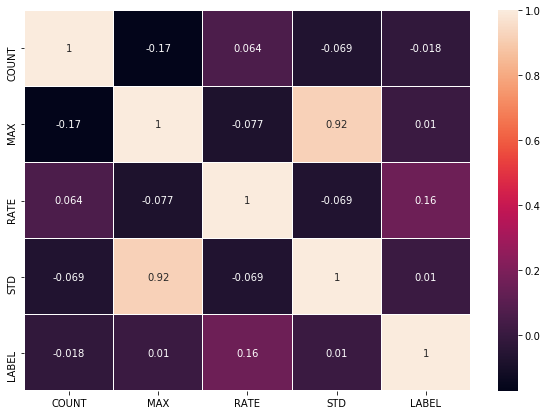

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = pd.read_csv('C:/Users/76000/Desktop/tianchi/oppo/train_x.csv')
y = pd.read_csv('C:/Users/76000/Desktop/tianchi/oppo/train_y.csv')

data = x.join(y)
cormat = data.corr()
f, ax = plt.subplots(figsize = (10,7))
sns.heatmap(cormat, annot = True, linewidths = 0.05, ax = ax)
plt.show()

In [1]:
#分段处理call_area_stats_per_city横向展开                        2018.10.25.     15:45-
import pandas as pd
import math
import numpy as np

######################################      读取data    #######################################
data = pd.read_csv('C:/Users/76000/Desktop/tianchi/oppo/oppo_round1_train_20180929.txt', sep='\t', header=None,
                     names = ['prefix','query_prediction','title','tag','label'])

sub_data = data.query_prediction      #sub_data是个Series, 每个记录是个dict


#制作Series的index

cols = []
for i in range(0,10):
    temp = 'query_prediction_'+str(i)
    cols.append(temp)

#分段处理数据

######################################    para   #####################################

N = data.shape[0]
cur = 0 #当前处理行数

DFs = []
batch_size = 5000.0   #需带小数点，方便batch_num的计算
batch_num = math.ceil(N/batch_size)

######################################    process    ###################################

while cur < N:
    sub_cur = 0    
    T = pd.DataFrame(columns = cols)
    c = 0
    while sub_cur < int(batch_size):        #每一段的大小
        if cur == N:
            break
        temp = eval(sub_data[cur])
        v = list(temp.values())
        V = list(map(float,v))
        V = np.array(V)
        
        z = np.zeros(10-V.shape[0])
        val = np.hstack((V,z))
        
        s = pd.Series(val,index = cols)
        T.loc[sub_cur] = s
        
        sub_cur += 1
        cur += 1
    DFs.append(T)
    print(len(DFs) , '/' , batch_num)
print("Append Begin!")  
    
T = pd.concat(DFs)
print(T.shape)

##############################################################################

#Save
#T.to_csv('call_area_stats_per_city_unique_df.csv',index = False)

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1 / 400
2 / 400
3 / 400
4 / 400
5 / 400
6 / 400
7 / 400
8 / 400
9 / 400
10 / 400
11 / 400
12 / 400
13 / 400
14 / 400
15 / 400
16 / 400
17 / 400
18 / 400
19 / 400
20 / 400
21 / 400
22 / 400
23 / 400
24 / 400
25 / 400
26 / 400
27 / 400
28 / 400
29 / 400
30 / 400
31 / 400
32 / 400
33 / 400
34 / 400
35 / 400
36 / 400
37 / 400
38 / 400
39 / 400
40 / 400
41 / 400
42 / 400
43 / 400
44 / 400
45 / 400
46 / 400
47 / 400
48 / 400
49 / 400
50 / 400
51 / 400
52 / 400
53 / 400
54 / 400
55 / 400
56 / 400
57 / 400
58 / 400
59 / 400
60 / 400
61 / 400
62 / 400
63 / 400
64 / 400
65 / 400
66 / 400
67 / 400
68 / 400
69 / 400
70 / 400
71 / 400
72 / 400
73 / 400
74 / 400
75 / 400
76 / 400
77 / 400
78 / 400
79 / 400
80 / 400
81 / 400
82 / 400
83 / 400
84 / 400
85 / 400
86 / 400
87 / 400
88 / 400
89 / 400
90 / 400
91 / 400
92 / 400
93 / 400
94 / 400
95 / 400
96 / 400
97 / 400
98 / 400
99 / 400
100 / 400
101 / 400
102 / 400
103 / 400
104 / 400
105 / 400
106 / 400
107 / 400
108 / 400
109 / 400
110 / 400
111 / 40

In [3]:
T.head(10)

,query_prediction_0,query_prediction_1,query_prediction_2,query_prediction_3,query_prediction_4,query_prediction_5,query_prediction_6,query_prediction_7,query_prediction_8,query_prediction_9
0,0.009,0.012,0.020,0.066,0.007,0.010,0.198,0.024,0.010,0.017
1,0.059,0.124,0.029,0.070,0.022,0.042,0.086,0.065,0.023,0.000
2,0.059,0.124,0.029,0.070,0.022,0.042,0.086,0.065,0.023,0.000
3,0.012,0.009,0.050,0.045,0.053,0.014,0.059,0.114,0.011,0.037
4,0.010,0.016,0.009,0.009,0.569,0.016,0.020,0.037,0.040,0.021
5,0.013,0.007,0.526,0.007,0.435,0.013,0.000,0.000,0.000,0.000
6,0.001,0.002,0.002,0.012,0.002,0.003,0.023,0.004,0.257,0.025
7,0.039,0.068,0.047,0.034,0.069,0.015,0.028,0.017,0.027,0.020
8,0.013,0.007,0.526,0.007,0.435,0.013,0.000,0.000,0.000,0.000
9,0.027,0.016,0.101,0.038,0.084,0.220,0.022,0.019,0.013,0.000


In [15]:
T['RATE'] = rate.values
T.head(10)

,query_prediction_0,query_prediction_1,query_prediction_2,query_prediction_3,query_prediction_4,query_prediction_5,query_prediction_6,query_prediction_7,query_prediction_8,query_prediction_9,RATE
0,0.009,0.012,0.020,0.066,0.007,0.010,0.198,0.024,0.010,0.017,0.313676
1,0.059,0.124,0.029,0.070,0.022,0.042,0.086,0.065,0.023,0.000,0.341615
2,0.059,0.124,0.029,0.070,0.022,0.042,0.086,0.065,0.023,0.000,0.437017
3,0.012,0.009,0.050,0.045,0.053,0.014,0.059,0.114,0.011,0.037,0.454706
4,0.010,0.016,0.009,0.009,0.569,0.016,0.020,0.037,0.040,0.021,0.437017
5,0.013,0.007,0.526,0.007,0.435,0.013,0.000,0.000,0.000,0.000,0.437017
6,0.001,0.002,0.002,0.012,0.002,0.003,0.023,0.004,0.257,0.025,0.395156
7,0.039,0.068,0.047,0.034,0.069,0.015,0.028,0.017,0.027,0.020,0.506395
8,0.013,0.007,0.526,0.007,0.435,0.013,0.000,0.000,0.000,0.000,0.506395
9,0.027,0.016,0.101,0.038,0.084,0.220,0.022,0.019,0.013,0.000,0.437017


In [16]:
T.to_csv('train_x_11.csv', index = False)

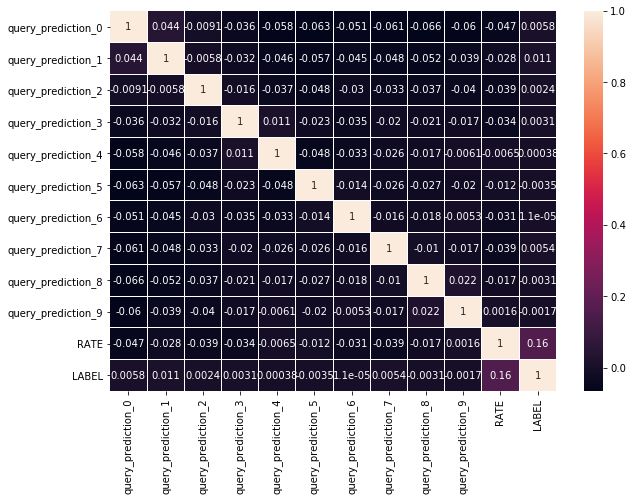

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = pd.read_csv('C:/Users/76000/Desktop/tianchi/oppo/train_x_11.csv')
y = pd.read_csv('C:/Users/76000/Desktop/tianchi/oppo/train_y.csv')

x['LABEL'] = y.values
cormat = x.corr()
f, ax = plt.subplots(figsize = (10,7))
sns.heatmap(cormat, annot = True, linewidths = 0.05, ax = ax)
plt.show()

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('C:/Users/76000/Desktop/tianchi/oppo/oppo_round1_train_20180929.txt', sep='\t', header=None,
                     names = ['prefix','query_prediction','title','tag','label'])

data.head()

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,prefix,query_prediction,title,tag,label
0,小品,"{""小品大全宋小宝"": ""0.009"", ""小品相亲"": ""0.012"", ""小品剧本"": ...",小品,阅读,0
1,1368,"{""13688cc赛马会"": ""0.059"", ""13685367892"": ""0.124""...",HCG大于1368%2C正常吗,健康,0
2,1368,"{""13688cc赛马会"": ""0.059"", ""13685367892"": ""0.124""...",1368年,百科,1
3,银耳,"{""银耳汤的功效"": ""0.012"", ""银耳为什么不能天天吃"": ""0.009"", ""银耳...",银耳红枣汤的做法,菜谱,1
4,月经量少,"{""月经量少喝红糖水好吗"": ""0.010"", ""月经量少该怎么调理"": ""0.016"", ...",月经量少怎么调理,百科,0


In [2]:
tag_list = list(data.tag.unique())

bar_count = np.zeros((len(data.tag.unique()),2))

for i in range(0,data.shape[0]):
    t = data.loc[i].tag
    l = data.loc[i].label
    index = tag_list.index(t)
    if l == 0:
        bar_count[index][0] += 1
    else:
        bar_count[index][1] += 1